In [ ]:
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def build_lenet(width,height,depth,classes):
  model= Sequential()
  model.add(Conv2D(6,(5, 5),padding="valid",input_shape=(height,width,depth)))
  model.add(Activation("tanh"))
  model.add(AveragePooling2D(pool_size=(2,2),strides=(2, 2)))

  model.add(Conv2D(16,(5, 5),padding="valid"))
  model.add(Activation("tanh"))
  model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(120,(5, 5),padding="valid"))
  model.add(Activation("tanh"))

  model.add(Flatten())
  model.add(Dense(84))
  model.add(Activation("tanh"))

  model.add(Dense(classes))
  model.add(Activation("softmax"))

  return model



In [ ]:
def graph_history_training(history):
  plt.grid(b=None)
  plt.axis('off')
  training_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epoch_count = range(1, len(train_accuracy) + 1)
  plt.subplot(211)
  plt.plot(epoch_count, training_loss, 'r--')
  plt.plot(epoch_count, val_loss, 'b-')
  plt.legend(['Training Loss', 'Valid Loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  plt.subplot(212)
  plt.plot(epoch_count, train_accuracy, 'r--')
  plt.plot(epoch_count,val_accuracy, 'b-')
  plt.legend(['Training Accuracy', 'Valid Accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel("Accuracy")
  plt.show();

  plt.show()

In [ ]:
(trainData,trainLabels),(testData,testLabels) = mnist.load_data()

In [ ]:
print(trainData.shape,testData.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
trainX=np.zeros((60000,32,32))
testX=np.zeros((10000,32,32))
for i in range(trainData.shape[0]):
  padded_array = np.pad(trainData[i], 2, mode='constant')
  trainX[i]=padded_array
for i in range(testData.shape[0]):
  padded_array = np.pad(testData[i], 2, mode='constant')
  testX[i]=padded_array

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(trainX.shape,testX.shape,trainLabels.shape,testLabels.shape)
print(trainLabels[0])

(60000, 32, 32) (10000, 32, 32) (60000,) (10000,)
5


In [ ]:
trainX = trainX[:,:,:,np.newaxis]
testX = testX[:,:,:,np.newaxis]


In [ ]:
trainX = trainX/255.0
testX = testX/255.0

In [ ]:
trainLabels = np_utils.to_categorical(trainLabels,10)
testLabels = np_utils.to_categorical(testLabels,10)

In [ ]:
opt= SGD(lr=0.01)
model = build_lenet(width=32,height=32,depth=1,classes=10)
print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_6 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 120)        

In [ ]:
history = model.fit(trainX,trainLabels,batch_size=128,epochs=40,validation_split=0.1,verbose=1)

Epoch 1/40
422/422 [==============================] - 2s 4ms/step - loss: 1.8306 - accuracy: 0.5042 - val_loss: 0.5777 - val_accuracy: 0.8725
Epoch 2/40
422/422 [==============================] - 1s 3ms/step - loss: 0.5711 - accuracy: 0.8548 - val_loss: 0.3678 - val_accuracy: 0.9072
Epoch 3/40
422/422 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8868 - val_loss: 0.3014 - val_accuracy: 0.9158
Epoch 4/40
422/422 [==============================] - 1s 3ms/step - loss: 0.3556 - accuracy: 0.9002 - val_loss: 0.2668 - val_accuracy: 0.9258
Epoch 5/40
422/422 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.9070 - val_loss: 0.2409 - val_accuracy: 0.9318
Epoch 6/40
422/422 [==============================] - 1s 3ms/step - loss: 0.2905 - accuracy: 0.9145 - val_loss: 0.2209 - val_accuracy: 0.9383
Epoch 7/40
422/422 [==============================] - 1s 3ms/step - loss: 0.2685 - accuracy: 0.9206 - val_loss: 0.2050 - val_accuracy: 0.9422
Epoch 

In [ ]:
(val_loss,val_accuracy)= model.evaluate(testX,testLabels,batch_size=128,verbose=1)
print(val_accuracy*100)
print(val_loss)

79/79 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9805
98.04999828338623
0.06364419311285019


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


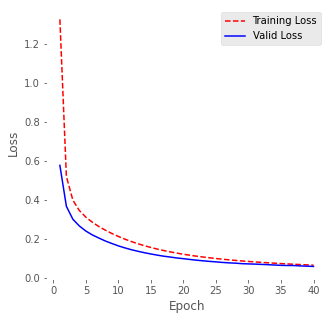

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.grid(b=None)

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
#plt.grid(True)
ax = plt.axes()
ax.set_facecolor("white")
plt.figure(1,figsize=(5,5))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Valid Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


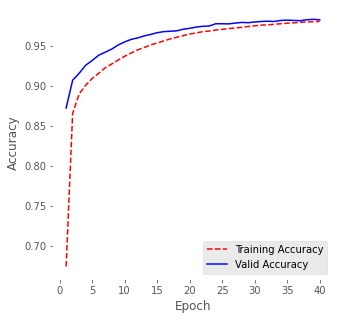

In [ ]:
train_accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
plt.grid(b=None)
# Create count of the number of epochs
epoch_count = range(1, len(train_accuracy) + 1)
ax = plt.axes()
ax.set_facecolor("white")
plt.figure(1,figsize=(5,5))
plt.plot(epoch_count, train_accuracy, 'r--')
plt.plot(epoch_count,val_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Valid Accuracy'])
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.show();